In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error as mse
%matplotlib inline

In [2]:
df = pd.read_csv("SBIN.csv")
df

,Date,Open,High,Low,Close,Volume
0,03-01-2017,239.601049,241.957775,236.753338,240.484817,15963085
1,04-01-2017,241.368600,241.957774,237.833497,238.520874,11225978
2,05-01-2017,240.583016,241.466784,239.306450,240.926712,11970913
3,06-01-2017,241.564985,244.510899,241.073999,241.466782,12354302
4,09-01-2017,241.957764,243.872620,241.564981,242.596054,8329253
...,...,...,...,...,...,...
1090,08-06-2021,432.250000,432.500000,424.000000,427.200012,31113823
1091,09-06-2021,427.500000,432.299988,418.200012,421.450012,27784834
1092,10-06-2021,424.899994,433.299988,422.399994,432.250000,27397712
1093,11-06-2021,434.850006,435.500000,425.250000,429.600006,26831924


In [3]:
df['Date'] = pd.to_datetime(df.Date,dayfirst=True)

In [4]:
df

,Date,Open,High,Low,Close,Volume
0,2017-01-03,239.601049,241.957775,236.753338,240.484817,15963085
1,2017-01-04,241.368600,241.957774,237.833497,238.520874,11225978
2,2017-01-05,240.583016,241.466784,239.306450,240.926712,11970913
3,2017-01-06,241.564985,244.510899,241.073999,241.466782,12354302
4,2017-01-09,241.957764,243.872620,241.564981,242.596054,8329253
...,...,...,...,...,...,...
1090,2021-06-08,432.250000,432.500000,424.000000,427.200012,31113823
1091,2021-06-09,427.500000,432.299988,418.200012,421.450012,27784834
1092,2021-06-10,424.899994,433.299988,422.399994,432.250000,27397712
1093,2021-06-11,434.850006,435.500000,425.250000,429.600006,26831924


In [5]:
data = df.drop(['Date'], axis=1)
data.index = df.Date

In [6]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,239.601049,241.957775,236.753338,240.484817,15963085
2017-01-04,241.368600,241.957774,237.833497,238.520874,11225978
2017-01-05,240.583016,241.466784,239.306450,240.926712,11970913
2017-01-06,241.564985,244.510899,241.073999,241.466782,12354302
2017-01-09,241.957764,243.872620,241.564981,242.596054,8329253
...,...,...,...,...,...
2021-06-08,432.250000,432.500000,424.000000,427.200012,31113823
2021-06-09,427.500000,432.299988,418.200012,421.450012,27784834
2021-06-10,424.899994,433.299988,422.399994,432.250000,27397712


In [7]:
train_df = data.iloc[:int(df.shape[0]*0.9595), :]
valid_df = data.iloc[int(df.shape[0]*0.9595):, :]

In [8]:
train_df.shape, valid_df.shape

((1050, 5), (45, 5))

In [9]:
df.shape

(1095, 6)

### Auto Regressive (AR) model

In [10]:
train_df

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,239.601049,241.957775,236.753338,240.484817,15963085
2017-01-04,241.368600,241.957774,237.833497,238.520874,11225978
2017-01-05,240.583016,241.466784,239.306450,240.926712,11970913
2017-01-06,241.564985,244.510899,241.073999,241.466782,12354302
2017-01-09,241.957764,243.872620,241.564981,242.596054,8329253
...,...,...,...,...,...
2021-03-31,357.003939,364.484889,354.675461,360.967346,38651025
2021-04-01,364.336282,368.497842,359.778357,367.259277,31883453
2021-04-05,364.138102,365.822562,345.856870,350.315704,51743981


In [11]:
len(valid_df), len(train_df)

(45, 1050)

In [12]:
len(valid_df), len(train_df)

(45, 1050)

In [13]:
from statsmodels.tsa.ar_model import AutoReg

# fit model
model = AutoReg(train_df['Close'], lags=1)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1050, 1094)
print(yhat)

1050    354.767843
1051    354.269561
1052    353.775082
1053    353.284379
1054    352.797421
1055    352.314180
1056    351.834628
1057    351.358738
1058    350.886479
1059    350.417826
1060    349.952751
1061    349.491226
1062    349.033224
1063    348.578718
1064    348.127682
1065    347.680089
1066    347.235912
1067    346.795127
1068    346.357706
1069    345.923624
1070    345.492856
1071    345.065376
1072    344.641160
1073    344.220182
1074    343.802418
1075    343.387842
1076    342.976432
1077    342.568162
1078    342.163008
1079    341.760948
1080    341.361957
1081    340.966011
1082    340.573088
1083    340.183165
1084    339.796218
1085    339.412225
1086    339.031163
1087    338.653010
1088    338.277744
1089    337.905342
1090    337.535783
1091    337.169046
1092    336.805108
1093    336.443948
1094    336.085545
dtype: float64


C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with

In [14]:
yhat.index = valid_df.index

In [15]:
mse(yhat, valid_df['Close'])

2950.2350574664265

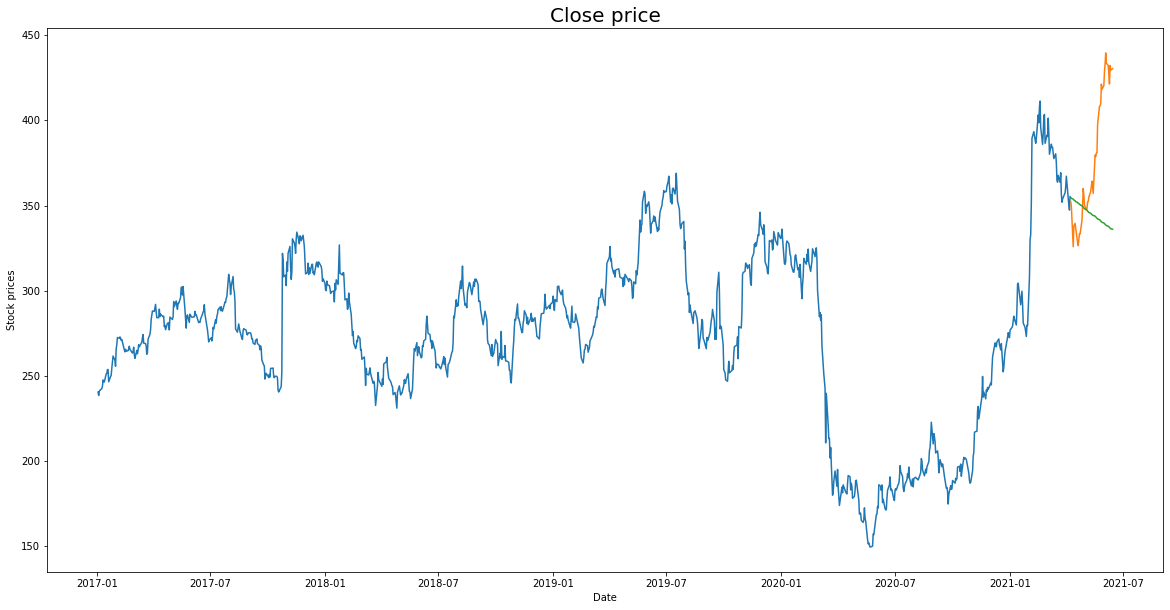

In [16]:
plt.figure(figsize=(20,10))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.xlabel("Date")
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
#plt.legend()
plt.show()

### Moving Average (MA)

In [17]:
# MA example
from statsmodels.tsa.arima_model import ARMA

# fit model
model = ARMA(train_df['Close'], order=(0,1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(1050, 1094)
print(yhat)

# model = AutoReg(train_df['Close'], lags=1)
# model_fit = model.fit()
# # make prediction
# yhat = model_fit.predict(982, 1227)
# print(yhat)

1050    307.215381
1051    275.253875
1052    275.253875
1053    275.253875
1054    275.253875
1055    275.253875
1056    275.253875
1057    275.253875
1058    275.253875
1059    275.253875
1060    275.253875
1061    275.253875
1062    275.253875
1063    275.253875
1064    275.253875
1065    275.253875
1066    275.253875
1067    275.253875
1068    275.253875
1069    275.253875
1070    275.253875
1071    275.253875
1072    275.253875
1073    275.253875
1074    275.253875
1075    275.253875
1076    275.253875
1077    275.253875
1078    275.253875
1079    275.253875
1080    275.253875
1081    275.253875
1082    275.253875
1083    275.253875
1084    275.253875
1085    275.253875
1086    275.253875
1087    275.253875
1088    275.253875
1089    275.253875
1090    275.253875
1091    275.253875
1092    275.253875
1093    275.253875
1094    275.253875
dtype: float64


C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated fre

In [18]:
yhat.index = valid_df.index

mse(yhat, valid_df['Close'])

11970.619395128946

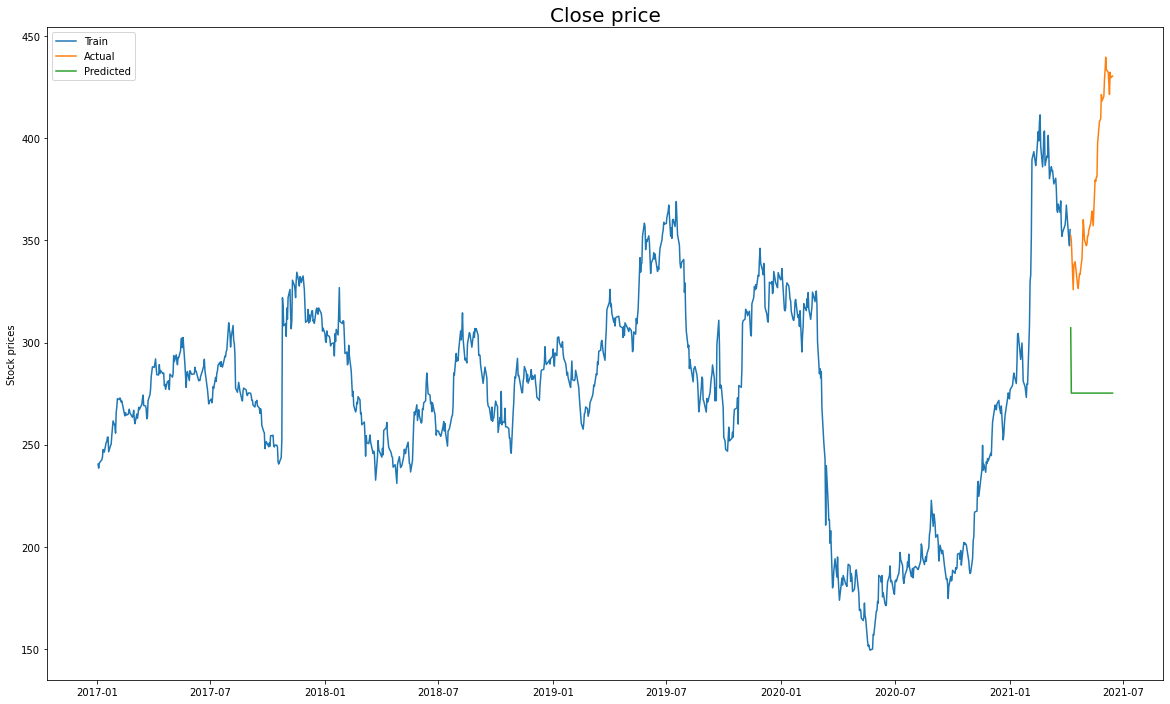

In [19]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
plt.legend()
plt.show()

### Autoregressive Moving Average (ARMA)

### ARMA(1,2)

In [20]:
from statsmodels.tsa.arima_model import ARMA

# fit model
model = ARMA(train_df['Close'], order=(1, 2))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(1050, 1094)
#print(yhat)

yhat.index = valid_df.index
mse(yhat, valid_df['Close'])

C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated fre

3333.3834597450914

### ARMA(2,1)

In [21]:
from statsmodels.tsa.arima_model import ARMA

# fit model
model = ARMA(train_df['Close'], order=(2, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(1050, 1094)
print(yhat)

C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated fre

1050    355.316689
1051    355.347402
1052    355.362230
1053    355.361306
1054    355.344767
1055    355.312749
1056    355.265392
1057    355.202838
1058    355.125230
1059    355.032714
1060    354.925436
1061    354.803544
1062    354.667189
1063    354.516523
1064    354.351699
1065    354.172873
1066    353.980200
1067    353.773839
1068    353.553949
1069    353.320690
1070    353.074225
1071    352.814716
1072    352.542328
1073    352.257227
1074    351.959580
1075    351.649554
1076    351.327318
1077    350.993042
1078    350.646897
1079    350.289055
1080    349.919688
1081    349.538970
1082    349.147075
1083    348.744178
1084    348.330454
1085    347.906081
1086    347.471236
1087    347.026095
1088    346.570837
1089    346.105641
1090    345.630685
1091    345.146150
1092    344.652215
1093    344.149060
1094    343.636867
dtype: float64


C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [22]:
yhat.index = valid_df.index

mse(yhat, valid_df['Close'])

2410.36568254495

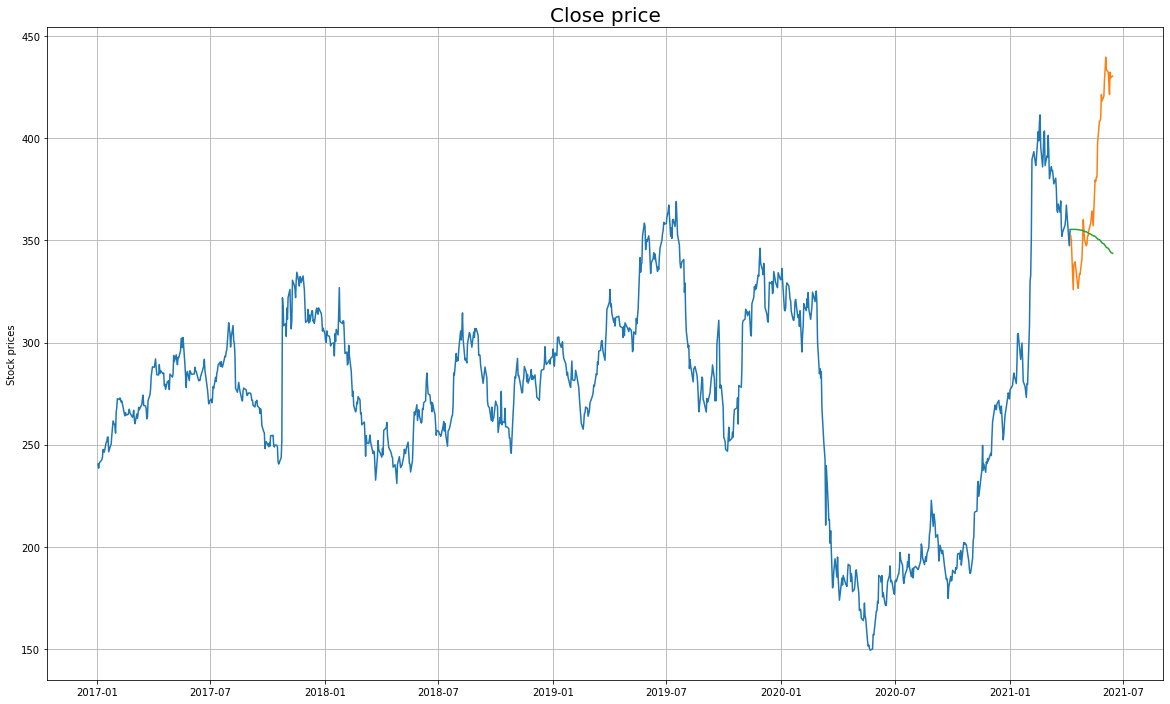

In [23]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
plt.grid()

### ARMA(2,2)

In [24]:
from statsmodels.tsa.arima_model import ARMA

# fit model
model = ARMA(train_df['Close'], order=(2, 2))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(1050, 1094)
#print(yhat)

yhat.index = valid_df.index
mse(yhat, valid_df['Close'])

C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated fre

3321.938655256507

### ARMA(3,1)

In [25]:
from statsmodels.tsa.arima_model import ARMA

# fit model
model = ARMA(train_df['Close'], order=(3, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(1050, 1094)
#print(yhat)

yhat.index = valid_df.index
mse(yhat, valid_df['Close'])

C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated fre

3327.615419755327

### ARMA(3,2)

In [26]:
from statsmodels.tsa.arima_model import ARMA

# fit model
model = ARMA(train_df['Close'], order=(3, 2))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(1050, 1094)
#print(yhat)

yhat.index = valid_df.index
mse(yhat, valid_df['Close'])

C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated fre

3230.632411475969

### ARMA(3,3)

In [27]:
from statsmodels.tsa.arima_model import ARMA

# fit model
model = ARMA(train_df['Close'], order=(3, 3))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(1050, 1094)
#print(yhat)

yhat.index = valid_df.index
mse(yhat, valid_df['Close'])

C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated fre

3265.2425898568704

In [28]:
from statsmodels.tsa.arima_model import ARMA

# fit model
model = ARMA(train_df['Close'], order=(1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(1050, 1094)
#print(yhat)

yhat.index = valid_df.index
mse(yhat, valid_df['Close'])

C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated fre

3258.403819955214

### Autoregressive Integrated Moving Average (ARIMA)

### ARIMA(1,1,1)

In [29]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(train_df['Close'], order=(1, 1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(1050, 1094, typ='levels')
print(yhat)

C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated fre

1049    355.213577
1050    355.175216
1051    355.152912
1052    355.144917
1053    355.149674
1054    355.165793
1055    355.192038
1056    355.227305
1057    355.270612
1058    355.321084
1059    355.377940
1060    355.440485
1061    355.508100
1062    355.580233
1063    355.656392
1064    355.736138
1065    355.819080
1066    355.904871
1067    355.993201
1068    356.083792
1069    356.176399
1070    356.270802
1071    356.366806
1072    356.464237
1073    356.562938
1074    356.662771
1075    356.763614
1076    356.865357
1077    356.967900
1078    357.071158
1079    357.175052
1080    357.279514
1081    357.384480
1082    357.489897
1083    357.595715
1084    357.701891
1085    357.808386
1086    357.915164
1087    358.022195
1088    358.129452
1089    358.236910
1090    358.344547
1091    358.452343
1092    358.560281
1093    358.668346
dtype: float64


C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [30]:
yhat.index = valid_df.index

mse(yhat, valid_df['Close'])

1808.1387962878691

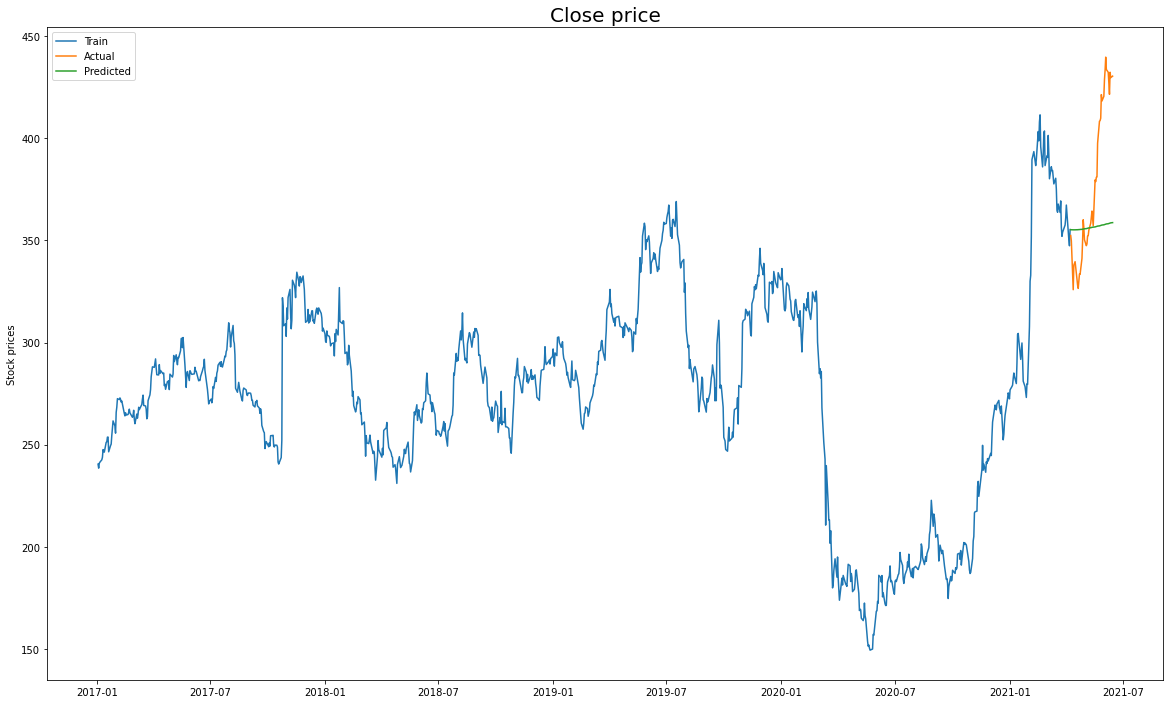

In [31]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
plt.legend()
plt.show()

### ARIMA(2,1,1)

In [32]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(train_df['Close'], order=(2, 1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(1050, 1094, typ='levels')
print(yhat)

C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated fre

1049    355.506419
1050    355.815176
1051    355.899559
1052    356.018447
1053    356.126097
1054    356.236334
1055    356.345885
1056    356.455606
1057    356.565284
1058    356.674973
1059    356.784659
1060    356.894346
1061    357.004032
1062    357.113719
1063    357.223405
1064    357.333092
1065    357.442779
1066    357.552465
1067    357.662152
1068    357.771838
1069    357.881525
1070    357.991212
1071    358.100898
1072    358.210585
1073    358.320271
1074    358.429958
1075    358.539644
1076    358.649331
1077    358.759018
1078    358.868704
1079    358.978391
1080    359.088077
1081    359.197764
1082    359.307451
1083    359.417137
1084    359.526824
1085    359.636510
1086    359.746197
1087    359.855884
1088    359.965570
1089    360.075257
1090    360.184943
1091    360.294630
1092    360.404317
1093    360.514003
dtype: float64


C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [33]:
yhat.index = valid_df.index

mse(yhat, valid_df['Close'])

1724.0258931355193

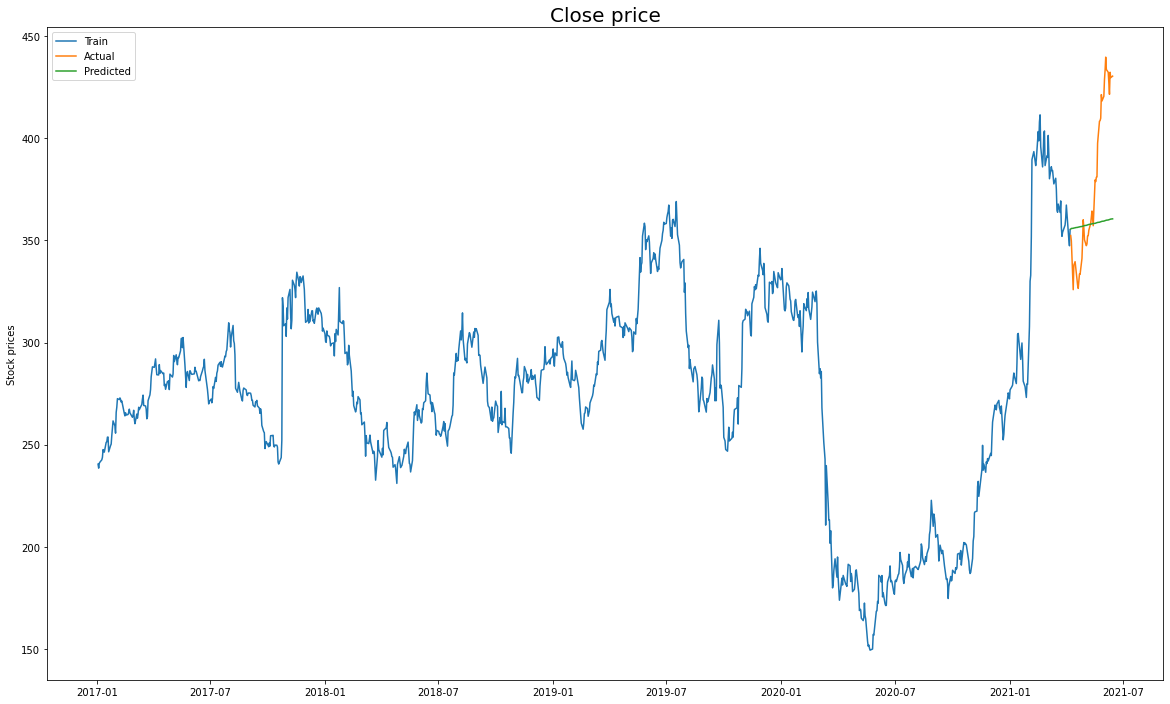

In [34]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
plt.legend()
plt.show()

### ARIMA(2,1,2)

In [35]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(train_df['Close'], order=(2, 1, 2))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(1050, 1094, typ='levels')
#print(yhat)

yhat.index = valid_df.index
mse(yhat, valid_df['Close'])

C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated fre

1728.6374288038996

### ARIMA(3,1,1)

In [36]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(train_df['Close'], order=(3, 1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(1050, 1094, typ='levels')
#print(yhat)

yhat.index = valid_df.index
mse(yhat, valid_df['Close'])

C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated fre

1719.7230752186892

### ARIMA(3,1,2)

In [37]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(train_df['Close'], order=(3, 1, 2))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(1050, 1094, typ='levels')
#print(yhat)

yhat.index = valid_df.index
mse(yhat, valid_df['Close'])

C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated fre

1711.022510184328

### ARIMA(3,1,3)

In [38]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(train_df['Close'], order=(3, 1, 3))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(1050, 1094, typ='levels')
#print(yhat)

yhat.index = valid_df.index
mse(yhat, valid_df['Close'])

C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated fre

1803.4443517311004

In [42]:
!pip install pmdarima --user

In [43]:
from pmdarima.arima import auto_arima

model_auto = auto_arima(train_df['Close'],exog=train_df['Open'],
                        m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5)
model_auto.summary()

ModuleNotFoundError: No module named 'pmdarima'

### Seasonal Autoregressive Integrated Moving-Average (SARIMA)

In [44]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# fit model
model = SARIMAX(train_df['Close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(1050, 1094)
print(yhat)

C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


1050    355.544211
1051    355.718411
1052    358.052240
1053    357.655511
1054    357.736652
1055    357.454212
1056    357.453129
1057    358.028691
1058    358.307772
1059    355.866279
1060    354.665802
1061    355.516970
1062    355.467607
1063    356.066668
1064    358.109314
1065    358.885922
1066    359.420893
1067    358.938252
1068    358.612905
1069    358.926037
1070    358.648797
1071    357.573482
1072    356.544597
1073    356.736935
1074    356.661170
1075    357.303427
1076    359.321632
1077    360.210698
1078    360.790298
1079    360.290655
1080    359.936411
1081    360.226221
1082    359.897911
1083    358.951630
1084    357.939628
1085    358.070868
1086    357.993204
1087    358.640003
1088    360.656334
1089    361.556301
1090    362.140391
1091    361.639412
1092    361.282679
1093    361.570489
1094    361.237552
Name: predicted_mean, dtype: float64


C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [45]:
yhat.index = valid_df.index

mse(yhat, valid_df['Close'])

1716.7120458125817

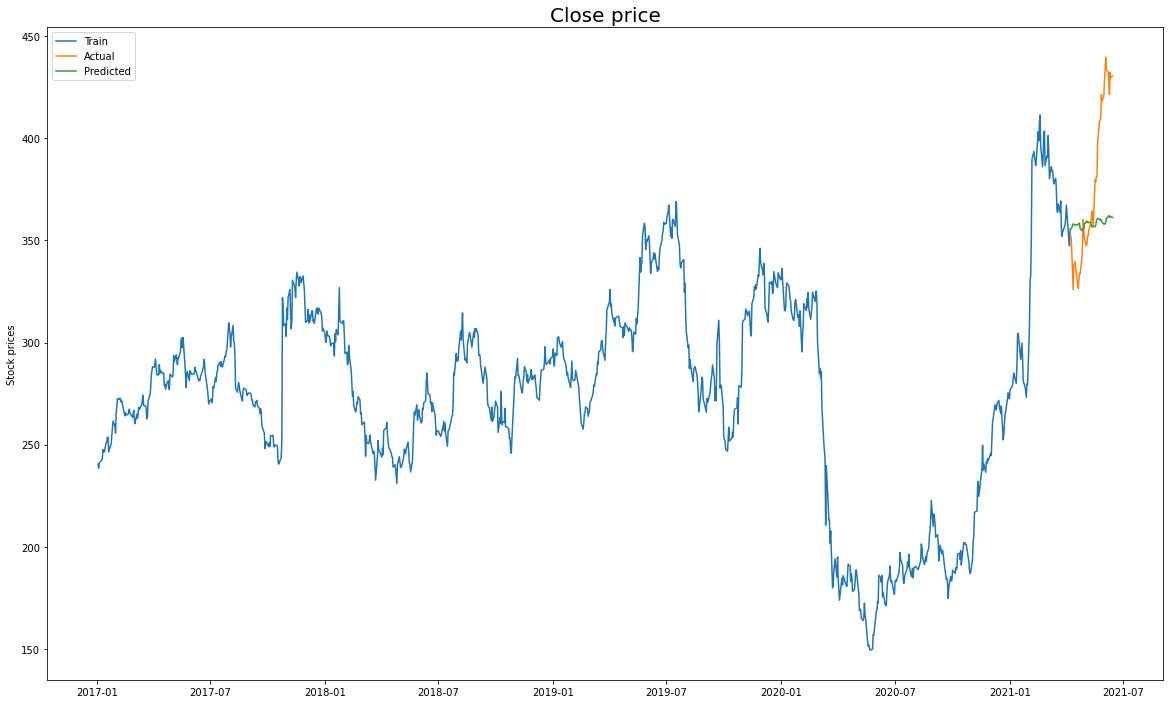

In [46]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
plt.legend()
plt.show()

### Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)

In [47]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# fit model
model = SARIMAX(train_df['Close'], exog=train_df['Open'], order=(1, 1, 1), seasonal_order=(1,1,1,4))
model_fit = model.fit(disp=False)
# make prediction

yhat = model_fit.predict(1050, 1094, exog = valid_df['Open'])
print(yhat)

C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1050    356.499556
1051    349.348869
1052    339.019585
1053    328.920407
1054    338.127832
1055    338.380432
1056    322.537263
1057    331.816198
1058    322.322700
1059    327.239969
1060    334.418405
1061    340.551175
1062    352.759990
1063    359.984670
1064    348.360287
1065    346.048885
1066    350.795522
1067    351.638055
1068    352.827041
1069    353.804926
1070    356.195067
1071    351.980984
1072    357.539282
1073    366.077553
1074    360.023654
1075    384.529219
1076    376.390463
1077    382.768617
1078    385.158784
1079    411.038967
1080    408.889603
1081    409.081985
1082    408.428356
1083    424.293498
1084    414.681906
1085    421.109145
1086    425.217578
1087    434.636378
1088    434.848030
1089    433.938601
1090    430.558988
1091    425.221775
1092    422.361523
1093    433.690142
1094    425.355856
Name: predicted_mean, dtype: float64


C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [48]:
yhat.index = valid_df.index

mse(yhat, valid_df['Close'])

46.29768659647174

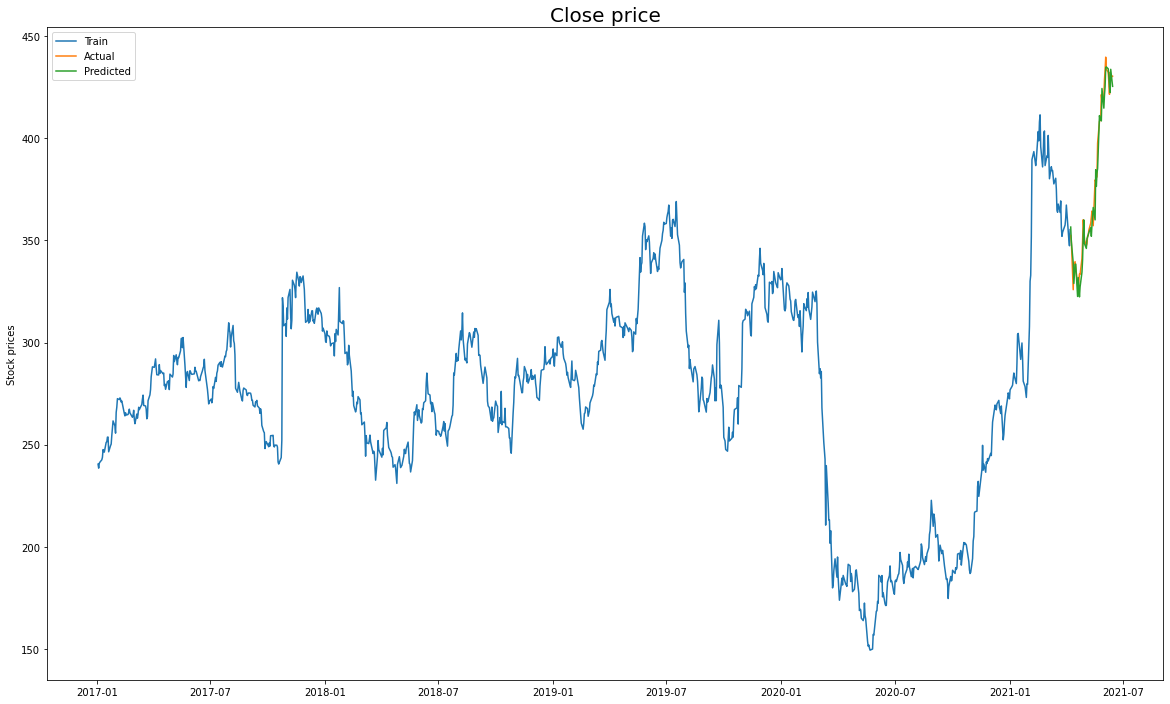

In [49]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
plt.legend()
plt.show()

### Simple Exponential Smoothing (SES)

In [50]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(train_df['Close'])
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1050, 1094)
print(yhat)

C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


1050    355.269958
1051    355.269958
1052    355.269958
1053    355.269958
1054    355.269958
1055    355.269958
1056    355.269958
1057    355.269958
1058    355.269958
1059    355.269958
1060    355.269958
1061    355.269958
1062    355.269958
1063    355.269958
1064    355.269958
1065    355.269958
1066    355.269958
1067    355.269958
1068    355.269958
1069    355.269958
1070    355.269958
1071    355.269958
1072    355.269958
1073    355.269958
1074    355.269958
1075    355.269958
1076    355.269958
1077    355.269958
1078    355.269958
1079    355.269958
1080    355.269958
1081    355.269958
1082    355.269958
1083    355.269958
1084    355.269958
1085    355.269958
1086    355.269958
1087    355.269958
1088    355.269958
1089    355.269958
1090    355.269958
1091    355.269958
1092    355.269958
1093    355.269958
1094    355.269958
dtype: float64


C:\Users\santosh2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [51]:
yhat.index = valid_df.index

mse(yhat, valid_df['Close'])

1946.057125175247

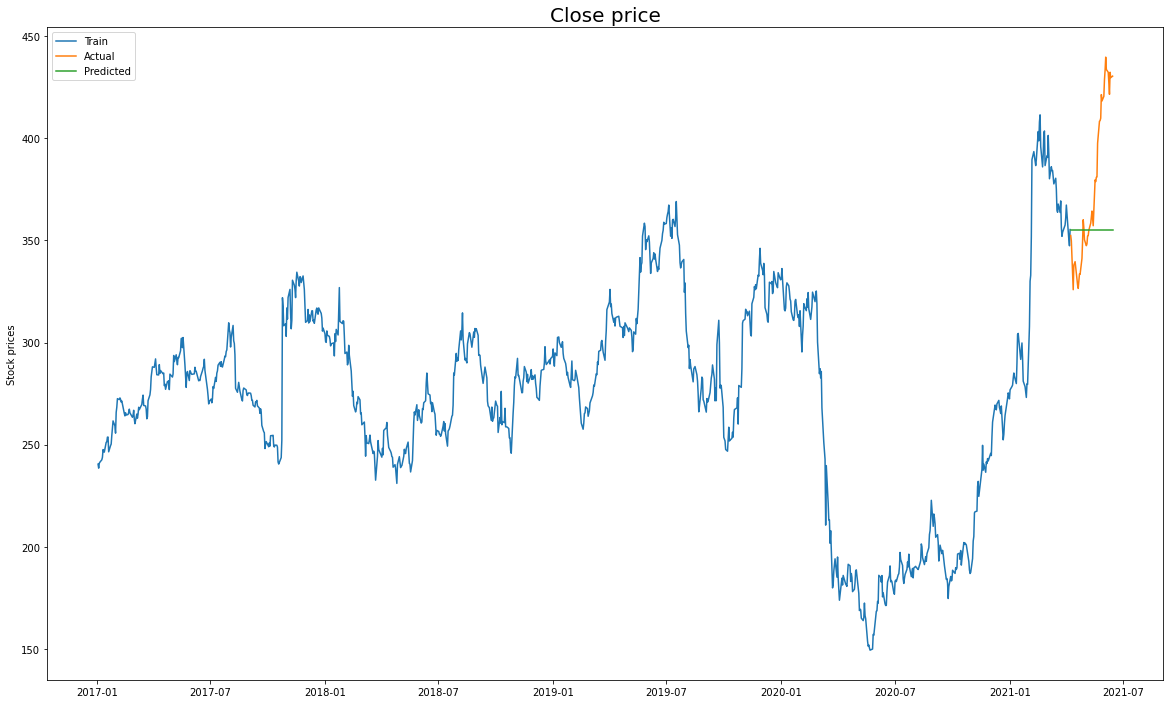

In [52]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
plt.legend()
plt.show()